<a href="https://colab.research.google.com/github/Lucas-Siade/lia1_2025_1/blob/main/ADR_Dogs_%26_Cats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Construindo um Modelo com Tensorflow -  🐶 🐱!**

**Problema: uma imagem, dizer se é um dog ou um cat.**

Computer Vision; Deep Learning; Machine Learning; Artificial Inteligence! Nada disso faz sentido sem dados, muitos dados (Big Data! 🚀). Para isso, teremos:

* **Treinamento**: 25.000 imagens nomeadas: 12.500 de dogs e 12.500 de cats.
* **Teste**: 1.000 imagens de dogs e cats.

Usa-se os dados de treino para treinar o algoritmo e então criar o modelo preditivo. Usa-se os dados de teste para confirmar o desempenho do modelo preditivo já treinado, ou seja, apresenta-se ao modelo preditivo dados que ele não viu durante o treinamento, a fim de garantir que ele seja capaz de fazer previsões.

Por fim, o modelo de duas camadas de convolução seguidas de pooling, a camada de flattening, e as camadas totalmente conectadas (Dense), com a função de ativação sigmoid para a saída binária.

**Não há mágica. Há matemática!** 🧙

Fonte de dados

O Kaggle oferece diversos datasets públicos que podem ser usados para você desenvolver seus projetos e incluir no seu portfólio, uma excelente forma de demonstrar suas habilidades em Data Science e Machine Learning. Usaremos como fonte de dados, o famoso [dataset Dogs and Cats](https://www.kaggle.com/c/dogs-vs-cats/data).

**Construindo a Rede Neural Convolucional**

O Keras é uma biblioteca do TensorFlow.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model

import keras as K
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Conv2D, Dropout,MaxPooling2D, Flatten, Dense

from sklearn.metrics import confusion_matrix

In [2]:
# Inicializando a Rede Neural Convolucional
classifier = Sequential()

In [3]:
# Adicionando a Primeira Camada de Convolução
classifier.add(Conv2D(32, (3, 3), input_shape = (100, 100, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adicionando a Segunda Camada de Convolução
classifier.add(Conv2D(64, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adicionando a Terceira Camada de Convolução
classifier.add(Conv2D(64, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Flattening - Transformando em 1D
classifier.add(Flatten())

# Dropout
classifier.add(Dropout(0.5))

# Full connection
classifier.add(Dense(units = 128, activation = 'relu'))

classifier.add(Dense(units = 1, activation = 'sigmoid'))

# Compilando a rede
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**Pré-processamento**

Fazer pré-processamento nos dados, em nosso caso as imagens.

In [4]:
# Criar o objeto com as regras de pré-processamento
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   horizontal_flip = True,
                                   rotation_range=15,
                                   brightness_range=[0.8, 1.2],
                                   validation_split=0.2)

In [5]:
# Pré-processamento das imagens de treino
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/ADR - Dataset - Dogs & Cats/Treino',
                                                 target_size = (100, 100),
                                                 batch_size = 32,
                                                 class_mode = 'binary',
                                                 subset='training')

Found 879 images belonging to 2 classes.


**Treinamento do Modelo**

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 109s 161ms/step - accuracy: 0.4937 - loss: 0.7090
Epoch 2/50


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


625/625 ━━━━━━━━━━━━━━━━━━━━ 40s 8ms/step - accuracy: 0.5281 - loss: 0.6913   
Epoch 3/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.5187 - loss: 0.6908    
Epoch 4/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.5252 - loss: 0.6928  
Epoch 5/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.5507 - loss: 0.6873    
Epoch 6/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.5439 - loss: 0.6865   
Epoch 7/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.5799 - loss: 0.6774   
Epoch 8/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.5936 - loss: 0.6599    
Epoch 9/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.6035 - loss: 0.6596   
Epoch 10/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.6182 - loss: 0.6494   
Epoch 11/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.6676 - loss: 0.6075    
Epoch 12/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.6925 - loss: 0.5736   
Epoch 13/50
625/62

NameError: name 'history' is not defined

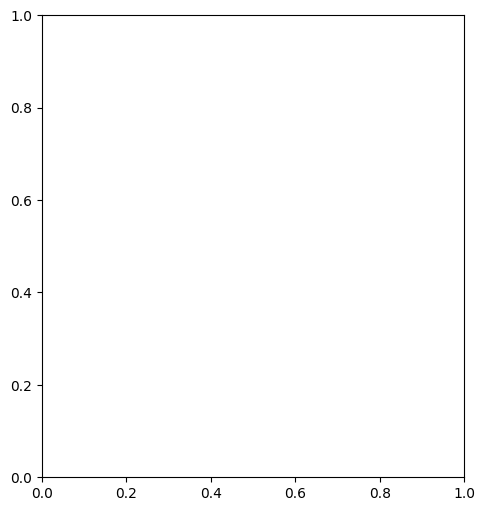

In [6]:
# Executando o treinamento
classifier.fit(
    training_set,
    steps_per_epoch=625,
    epochs=50)

# O erro da saída foi um gráfico errado.

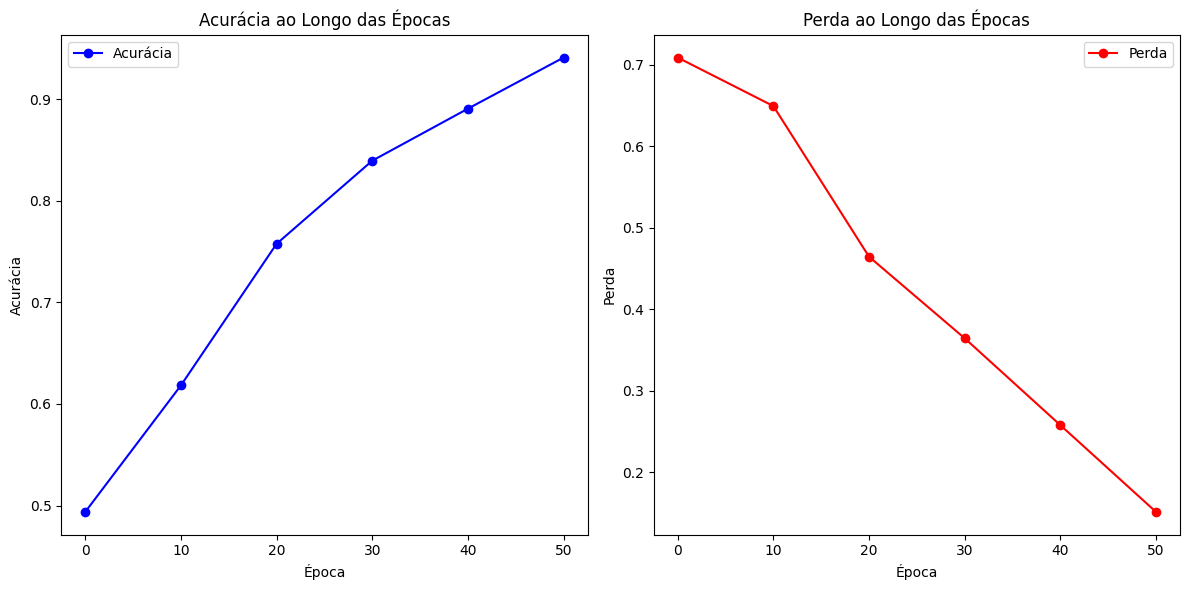

In [13]:
import matplotlib.pyplot as plt

epochs = [0, 10, 20, 30, 40, 50]
accuracy = [0.4937, 0.6182, 0.7575, 0.8393, 0.8905, 0.9408]
loss = [0.7090, 0.6494, 0.4644, 0.3642, 0.2575, 0.1509]

# Criando o gráfico
plt.figure(figsize=(12, 6))

# Plotando a acurácia
plt.subplot(1, 2, 1)
plt.plot(epochs, accuracy, marker='o', color='blue', label='Acurácia')
plt.title('Acurácia ao Longo das Épocas')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.xticks(epochs)
plt.legend()

# Plotando a perda
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, marker='o', color='red', label='Perda')
plt.title('Perda ao Longo das Épocas')
plt.xlabel('Época')
plt.ylabel('Perda')
plt.xticks(epochs)
plt.legend()

# Exibindo os gráficos
plt.tight_layout()
plt.show()

**Salvar o Modelo**

O Modelo é salvo para ser reutilizado em outros momentos sem que faça um novo treinamento.

In [7]:
model_save_path = '/content/drive/MyDrive/ADR - Dataset - Dogs & Cats/modelo.h5'

# Salvar o modelo inteiro
classifier.save(model_save_path)

print(f'Modelo salvo em: {model_save_path}')

Modelo salvo em: /content/drive/MyDrive/ADR - Dataset - Dogs & Cats/modelo.h5


In [8]:
model_save_path = '/content/drive/MyDrive/ADR - Dataset - Dogs & Cats/modelo.h5'

# Carregar o modelo inteiro
classifier = load_model(model_save_path)

print(f'Modelo carregado com sucesso de: {model_save_path}')

Modelo carregado com sucesso de: /content/drive/MyDrive/ADR - Dataset - Dogs & Cats/modelo.h5


Treinamento concluído com sucesso! 💪 Observe se ao final de cada época a acurácia aumenta.


**Teste do Modelo**


Testar o modelo treinado com imagens que ele ainda não viu. Por fim, verificamos o resultado da previsão e emitimos a informação se a imagem é de um gato ou cachorro.

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 593ms/step
Previsão: Cachorro.
Acurácia: 100.0 %.


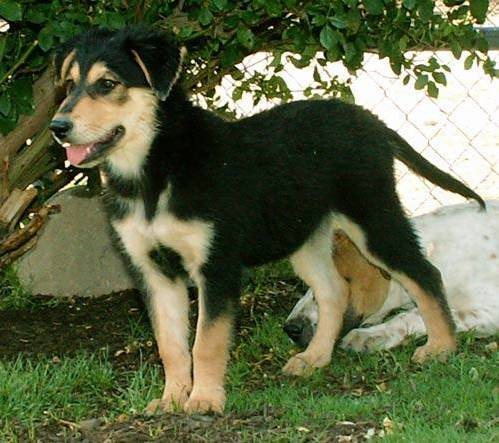

In [10]:
# Carregando a imagem de teste
test_image = image.load_img('/content/drive/MyDrive/ADR - Dataset - Dogs & Cats/Teste/Dogs/dog.11458.jpg', target_size=(100, 100))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
test_image = test_image / 255.0  # Normalizar a imagem

# Fazendo a previsão usando o modelo classifier
result = classifier.predict(test_image)
class_indices = training_set.class_indices

if result[0][0] >= 0.5:
    prediction = 'Cachorro.'
    accuracy = round(result[0][0] * 100, 2)
else:
    prediction = 'Gato.'
    accuracy = round((1 - result[0][0]) * 100, 2)

# Exibindo a previsão e a acurácia
print("Previsão:", prediction)
print("Acurácia:", accuracy, "%.")

# Exibindo a imagem
Image(filename='/content/drive/MyDrive/ADR - Dataset - Dogs & Cats/Teste/Dogs/dog.11458.jpg')


**Matriz de Confusão**

In [9]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/ADR - Dataset - Dogs & Cats/Teste',
    target_size=(100, 100),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

# Fazer as previsões
predictions = classifier.predict(test_generator, verbose=1)

# Se a tarefa for binária, você pode arredondar as previsões
predictions = (predictions > 0.5).astype('int32')  # Para problemas binários

# Obter os rótulos reais
true_labels = test_generator.classes

# Calcular a matriz de confusão
cm = confusion_matrix(true_labels, predictions)

# Exibir a matriz de confusão
print("Matriz de Confusão:")
print(cm)


Found 100 images belonging to 2 classes.
4/4 ━━━━━━━━━━━━━━━━━━━━ 11s 4s/step
Matriz de Confusão:
[[33 17]
 [ 8 42]]


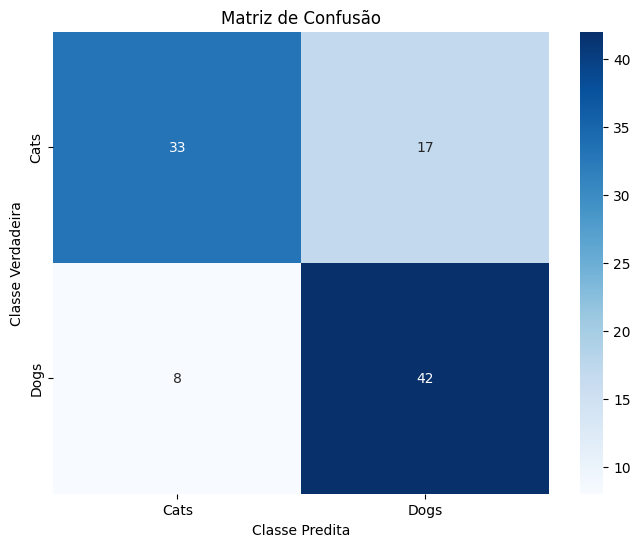

In [11]:
plt.figure(figsize=(8, 6))  # Define o tamanho da figura
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())

# Adicionar título e rótulos
plt.title('Matriz de Confusão')
plt.xlabel('Classe Predita')
plt.ylabel('Classe Verdadeira')

# Exibir o gráfico
plt.show()